In [70]:
import FeatureExtract
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Test if 5 different models (for each measured Qubit one) can do better than one single one

In [87]:
df = FeatureExtract.extract_all(1000)
display(df)
input_string = df['observable']
encoded_string = []
for string in input_string:
    encoded_string.append(''.join(['0' if char == 'I' else '1' for char in string]))
df['observable'] = encoded_string
df_qu0 = df[df['observable'] == '10000']
df_qu1 = df[df['observable'] == '01000']
df_qu2 = df[df['observable'] == '00100']
df_qu3 = df[df['observable'] == '00010']
df_qu4 = df[df['observable'] == '00001']

display(df_qu0)
display(df_qu1)


,noisy_expectation,num_layers,N2QG,observable,target
0,0.08758,1,8,IXIII,-0.100974
1,-0.04390,4,32,IIIIY,0.215809
2,0.20638,4,32,IIZII,0.052419
3,-0.14640,5,40,IIYII,-0.826789
4,0.03688,2,16,IYIII,0.013116
...,...,...,...,...,...
995,0.04128,2,16,IIYII,-0.250453
996,0.02004,3,24,IIIYI,-0.232102
997,0.04530,1,8,IXIII,0.015752
998,-0.00074,5,40,IIIXI,0.276041


,noisy_expectation,num_layers,N2QG,observable,target
9,-0.38178,4,32,10000,-0.283455
11,0.37398,3,24,10000,0.471689
18,-0.14900,2,16,10000,-0.369597
19,0.57188,1,8,10000,0.598581
23,-0.56334,3,24,10000,-0.868267
...,...,...,...,...,...
968,0.57172,5,40,10000,0.674824
975,0.04430,5,40,10000,-0.075460
980,0.37284,2,16,10000,0.158544
988,0.42696,1,8,10000,0.434335


,noisy_expectation,num_layers,N2QG,observable,target
0,0.08758,1,8,01000,-0.100974
4,0.03688,2,16,01000,0.013116
5,0.03384,4,32,01000,-0.065169
6,-0.07184,4,32,01000,0.006177
7,0.09928,2,16,01000,0.093968
...,...,...,...,...,...
970,-0.27644,2,16,01000,-0.634965
971,0.29610,2,16,01000,-0.501057
973,0.14930,5,40,01000,0.160356
984,0.06398,1,8,01000,-0.138530


In [89]:
model = LinearRegression()
model0 = model.fit(df_qu0['noisy_expectation'].to_numpy().reshape(-1,1), df_qu0['target'])
model = LinearRegression()
model1 = model.fit(df_qu1['noisy_expectation'].to_numpy().reshape(-1,1), df_qu1['target'])
model = LinearRegression()
model2 = model.fit(df_qu2['noisy_expectation'].to_numpy().reshape(-1,1), df_qu2['target'])
model = LinearRegression()
model3 = model.fit(df_qu3['noisy_expectation'].to_numpy().reshape(-1,1), df_qu3['target'])
model = LinearRegression()
model4 = model.fit(df_qu4['noisy_expectation'].to_numpy().reshape(-1,1), df_qu4['target'])

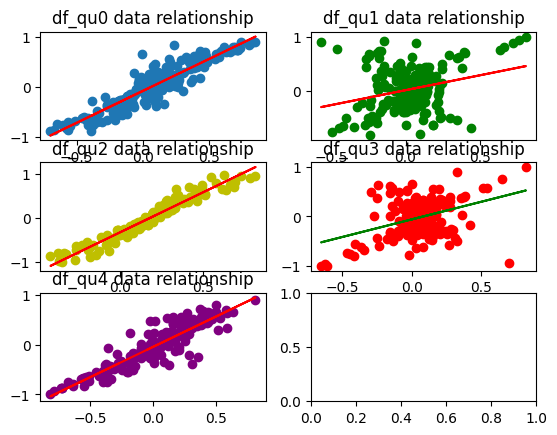

In [91]:
figure, axis = plt.subplots(3, 2)

axis[0,0].scatter(df_qu0['noisy_expectation'], df_qu0['target'])
axis[0,0].plot(df_qu0['noisy_expectation'], model0.predict(df_qu0['noisy_expectation'].to_numpy().reshape(-1, 1)), color='red')
axis[0,0].set_title('df_qu0 data relationship')

axis[0, 1].scatter(df_qu1['noisy_expectation'], df_qu1['target'], color='g')
axis[0, 1].plot(df_qu1['noisy_expectation'], model1.predict(df_qu1['noisy_expectation'].to_numpy().reshape(-1, 1)), color='red')
axis[0, 1].set_title('df_qu1 data relationship')


axis[1, 0].scatter(df_qu2['noisy_expectation'], df_qu2['target'], color='y')
axis[1, 0].plot(df_qu2['noisy_expectation'], model2.predict(df_qu2['noisy_expectation'].to_numpy().reshape(-1, 1)), color='red')
axis[1, 0].set_title('df_qu2 data relationship')

axis[1, 1].scatter(df_qu3['noisy_expectation'], df_qu3['target'], color='r')
axis[1, 1].plot(df_qu3['noisy_expectation'], model3.predict(df_qu3['noisy_expectation'].to_numpy().reshape(-1, 1)), color='g')
axis[1, 1].set_title('df_qu3 data relationship')

axis[2, 0].scatter(df_qu4['noisy_expectation'], df_qu4['target'], color='purple')
axis[2, 0].plot(df_qu4['noisy_expectation'], model4.predict(df_qu4['noisy_expectation'].to_numpy().reshape(-1, 1)), color='red')
axis[2, 0].set_title('df_qu4 data relationship')
plt.show(figure)